# Efficient Frontier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
industry_portfolios = pd.read_excel('Industry_Portfolios.xlsx')

/Users/ciel/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
industry_portfolios.sample()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.3,-0.42,1.28,1.86


## I Efficient Friontier (Risky Asset Only)

$$\sigma_p^2 =\frac{1}{\delta}+\frac{\delta}{\zeta\delta-\alpha^2}(R_p - R_{mv})^2$$
$$R_p = R_{mv} \pm (\zeta-\frac{\alpha^2}{\delta})^\frac{1}{2}\sigma_p$$
*Where*
$$\alpha = R'V^{-1}e$$
$$\zeta = R'V^{-1}R$$
$$\delta = e'V^{-1}e$$
$$R_{mv} = \frac{\alpha}{\delta}$$

>**Estimate Mean Return and Covariance of Returns**

In [4]:
R = pd.DataFrame(industry_portfolios.iloc[ :, 1 : 11].mean(), columns = ['Mean Return'])
R

,Mean Return
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [5]:
V = industry_portfolios.iloc[:, 1:11].cov()
V

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,11.193422,18.449666,14.104907,10.531341,12.922949,11.968078,10.170832,9.953112,7.866653,14.438409
Durbl,18.449666,69.920577,39.178097,27.019794,35.466652,27.490543,27.444731,16.824003,12.746136,39.361987
Manuf,14.104907,39.178097,28.198970,23.145380,24.618739,19.550150,17.622867,13.596447,11.440612,26.313423
Enrgy,10.531341,27.019794,23.145380,36.984933,19.267276,15.366817,11.297800,9.630327,14.027168,18.320469
HiTec,12.922949,35.466652,24.618739,19.267276,28.957220,18.708273,17.837115,13.254064,10.304187,23.855470
Telcm,11.968078,27.490543,19.550150,15.366817,18.708273,19.787227,14.169356,11.506599,10.991596,19.610836
Shops,10.170832,27.444731,17.622867,11.297800,17.837115,14.169356,16.759084,10.178849,6.694350,19.226524
Hlth,9.953112,16.824003,13.596447,9.630327,13.254064,11.506599,10.178849,14.342669,7.475036,14.864553
Utils,7.866653,12.746136,11.440612,14.027168,10.304187,10.991596,6.694350,7.475036,13.703052,9.992960
Other,14.438409,39.361987,26.313423,18.320469,23.855470,19.610836,19.226524,14.864553,9.992960,31.163771


>**Table of Mean Returns and Standard Deviation of Returns**

In [6]:
table = R.copy()
table['Standard Deviation'] = industry_portfolios.iloc[:, 1:11].std()
table

,Mean Return,Standard Deviation
NoDur,0.902833,3.345657
Durbl,0.733333,8.361852
Manuf,1.012833,5.310270
Enrgy,1.231167,6.081524
HiTec,0.766250,5.381191
Telcm,0.881417,4.448284
Shops,0.916333,4.093786
Hlth,0.783833,3.787172
Utils,0.907167,3.701763
Other,0.489083,5.582452


>**Plot Minimun-Variance Frontier**

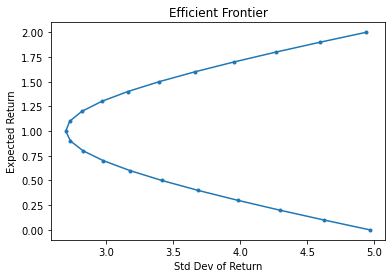

In [7]:
# Create V', e
inversed_V = np.linalg.inv(V)
e = pd.Series(np.ones(10))

# Get alpha, zeta, and delta
alpha = np.dot(np.dot(R.T, inversed_V), e)
zeta = np.dot(np.dot(R.T, inversed_V), R)
delta = np.dot(np.dot(e.T, inversed_V), e)

#Produce Rmv
Rmv = alpha/delta

# Calculate variance of returns for portfolio with Rp range from 0% to 2%
def efficient_frontier(Rp):
    variance_of_return_for_portfolio = 1/delta + (delta / (delta * zeta - pow(alpha, 2))) * pow(Rp - Rmv, 2)
    standard_deviation_of_return = pow(variance_of_return_for_portfolio, 0.5)
    return standard_deviation_of_return

Rp = np.arange(0, 2.1, 0.1)
standard_deviation_of_return = []
for rp in Rp:
    std = efficient_frontier(rp)
    standard_deviation_of_return.append(std[0][0])
    
efficient_frontier_data = pd.DataFrame([list(Rp), standard_deviation_of_return], ['Expected Return', 'Std Dev of Return']).T

# Plot Minimun-Variance Frontier

plt.plot( 'Std Dev of Return', 'Expected Return', data = efficient_frontier_data, marker = '.', linestyle = '-')
plt.title('Efficient Frontier')
plt.xlabel('Std Dev of Return')
plt.ylabel('Expected Return')
plt.show()

> **Economic Significance**: For an investor, the minimum variance frontier means that he/she can minimize risk while diversifying his/her risky asset portfolio, achieving maximum utility. And no portfolio will fall outside of the frontier.

## II Efficient Frontier with Riskless Asset

> **Method 1: Using Lagrange Method to Get the Frontier**

$$R_p = R_f\pm(\zeta-2\alpha R_f+\delta R_f^2)^\frac{1}{2}\sigma_p$$

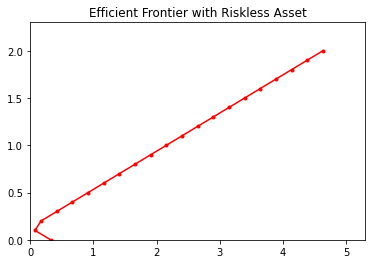

In [8]:
# Generate standard_deviation_of_return
def efficient_frontier_with_riskless_asset(Rp, Rf):
    variance_2 = (Rp - Rf)**2 / (zeta - 2*alpha*Rf + delta*(Rf**2))
    standard_deviation_of_return = variance_2**0.5
    return standard_deviation_of_return

std_of_return_2 = []
for rp in Rp:
    std = efficient_frontier_with_riskless_asset(rp, 0.13)
    std_of_return_2.append(std[0][0])
efficient_frontier_data['Std Dev of Return with Riskless Asset'] = std_of_return_2

#Plot Efficient Frontier with Rp range from 0% to 2% and Rf equals to 0.13%
plt.plot('Std Dev of Return with Riskless Asset', 'Expected Return', data = efficient_frontier_data, color = 'r', marker = '.', linestyle = '-')
plt.title('Efficient Frontier with Riskless Asset')
plt.xlim(0, 5.3)
plt.ylim(0, 2.3)
plt.show()

> **Economic Significance**: For an investor, the efficient frontier not only means maximizing investment returns while minimizing risk, but also helps the investor determine his/her allocation between risky and risk-free assets. So a risk-averse investor who want to maximize his/her utility must invest in the portfolio on frontier.

## III Tangent Portfolio

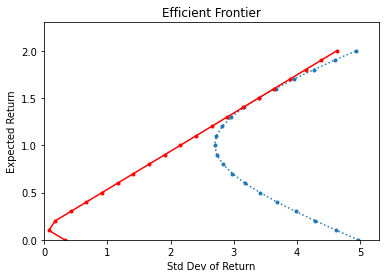

In [9]:
plt.plot( 'Std Dev of Return', 'Expected Return', data = efficient_frontier_data, marker = '.', linestyle = ':')
plt.plot('Std Dev of Return with Riskless Asset', 'Expected Return', data = efficient_frontier_data, color = 'r', marker = '.', linestyle = '-')
#plt.legend('Std Dev', 'Std Dev of Return with Riskless Asset')
plt.xlabel('Std Dev of Return')
plt.ylabel('Expected Return')
plt.xlim(0, 5.3)
plt.ylim(0, 2.3)
plt.title('Efficient Frontier')
plt.show()

>**Calculate Sharo Ratio**

$$\frac{R_{tg} - R_f}{\sigma_{tg}}=(\zeta - 2\alpha R_f + \delta R_f^2)^\frac{1}{2}$$
*Where* $$\sigma_{tg} = -\frac{(\zeta-2\alpha R_f + \delta R_f^2)^\frac{1}{2}}{\delta(R_f-R_{mv})}$$

In [10]:
Rf = 0.13
Sharp_Ratio = (zeta - 2*alpha*Rf + delta*Rf**2)**0.5
Sharp_Ratio[0][0]

0.4035655993495088

>**Method 2: Using Y-Intercept (0, 0.13) and slope (Sharp Ratio) to Draw the Frontier**

$$R_p = R_f\pm\frac{R_{tg} - R_f}{\sigma_{tg}}\sigma_p$$

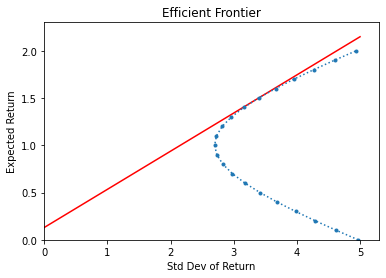

In [11]:
std = range(0, 6)
E_R = []
for rp in std:
    E_R.append(0.13 + Sharp_Ratio * std)
plt.plot(std, E_R[0][0], color = 'r')
plt.plot( 'Std Dev of Return', 'Expected Return', data = efficient_frontier_data, marker = '.', linestyle = ':')
plt.xlabel('Std Dev of Return')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.xlim(0, 5.3)
plt.ylim(0, 2.3)
plt.show()

>**The tangency portfolio weights for the ten industry portfolios.**

$$w^* = \lambda_{tg} V^{-1}(R-R_fe)$$
*Where*$$\lambda_{tg} = \frac{R_p - R_p}{\zeta-2\alpha R_f+\delta R_f^2}$$

In [12]:
Rtg = (alpha*Rf - zeta)/(delta*Rf - alpha)
lambda_of_Lagrange = (Rtg - Rf)/(zeta - 2*alpha*Rf + delta*Rf**2)
tangency_portfolio_weights = np.dot((lambda_of_Lagrange *  inversed_V), (np.array(R['Mean Return']) - Rf*e))
tangency_portfolio_weights

array([ 0.56797218, -0.2140726 ,  0.71410511,  0.10408719, -0.36343817,
       -0.09546326,  0.99164683,  0.0755702 ,  0.13264333, -0.91305081])

> **Economic Significance**: Tangent portfolio has the highest Sharp Ratio, which means it has the highest compensation for unit risk premium. For an investor, the tangent asset is the only risky asset he/she should invest in, i.e. he/she should allocate his money between the tangent asset and the risk-free asset. And under the market equilibrium, the tangent asset is the market asset, so the investor should invest the money allocated to the risky asset in all risky assets with the market value as the weight.